In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [19]:
health_stats_df = pd.read_csv("data/health_stats_global.csv")
health_stats_df.sample(15)
# health_stats_df.describe()
# health_stats_df.info()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
39252,Germany,DEU,"Population, total",SP.POP.TOTL,7.281490e+07,7.337763e+07,7.402578e+07,7.471435e+07,7.531834e+07,7.596370e+07,...,8.226637e+07,8.211010e+07,8.190231e+07,8.177693e+07,8.179767e+07,8.042582e+07,8.213275e+07,8.098250e+07,8.141314e+07,NaN
79053,Switzerland,CHE,"Age population, age 18, female, interpolated",SP.POP.AG18.FE.IN,3.891900e+04,4.061000e+04,4.287300e+04,4.519300e+04,4.735500e+04,4.938200e+04,...,4.373700e+04,4.447800e+04,4.495200e+04,4.521600e+04,4.590200e+04,4.597400e+04,4.548600e+04,4.468800e+04,4.352300e+04,NaN
23656,British Virgin Islands,VGB,Number of infant deaths,SH.DTH.IMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13565,Upper middle income,UMC,Female population 50-54,SP.POP.5054.FE,2.498873e+07,2.506566e+07,2.538778e+07,2.589648e+07,2.629678e+07,2.656826e+07,...,7.088516e+07,7.070968e+07,7.080021e+07,7.165733e+07,7.317881e+07,7.539738e+07,7.814342e+07,8.111588e+07,8.406624e+07,NaN
61697,Nauru,NRU,"Prevalence of severe wasting, weight for heigh...",SH.SVR.WAST.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,Europe & Central Asia (excluding high income),ECA,"Age population, age 15, male, interpolated",SP.POP.AG15.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13524,Upper middle income,UMC,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.817776e+01,NaN,NaN,NaN,NaN
13970,World,WLD,Male population 60-64,SP.POP.6064.MA,3.956839e+07,4.025215e+07,4.107197e+07,4.204321e+07,4.305869e+07,4.414777e+07,...,1.006107e+08,1.045966e+08,1.091421e+08,1.141947e+08,1.194156e+08,1.252976e+08,1.314837e+08,1.371108e+08,1.418757e+08,NaN
5031,High income,HIC,Number of under-five deaths,SH.DTH.MORT,8.726300e+05,8.354820e+05,7.974970e+05,7.691990e+05,7.266770e+05,6.843660e+05,...,1.347030e+05,1.314910e+05,1.279250e+05,1.247290e+05,1.216730e+05,1.181280e+05,1.146650e+05,1.109740e+05,1.075920e+05,NaN
52484,Liberia,LBR,"Age population, age 16, female, interpolated",SP.POP.AG16.FE.IN,1.194500e+04,1.178900e+04,1.169800e+04,1.161800e+04,1.173600e+04,1.215400e+04,...,3.631500e+04,3.741500e+04,3.878200e+04,4.047000e+04,4.224000e+04,4.389400e+04,4.551900e+04,4.714200e+04,4.874200e+04,NaN


In [18]:
health_stats_df['Indicator Name'].unique()

array(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       'Age popula

#### Possible questions

1. population growth percentages over time and variance over time

2. population vs other things

3. what are the effects of malnourishment? 'Number of people who are undernourished' 'Prevalence of undernourishment (% of population)'

4. 'Public spending on education, total (% of GDP)' vs STD's and/or other stats 'Cause of death, by injury (% of total)', 'Unemployment, total (% of total labor force)'

5. 'Consumption of iodized salt (% of households)' interesting? 'Literacy rate, youth total (% of people ages 15-24)'

6. 'Share of women employed in the nonagricultural sector (% of total nonagricultural employment)'

In [4]:
popgrowth_mask = health_stats_df['Indicator Name'] == 'Population growth (annual %)'
# health_stats_df[popgrowth_mask].head()

pop_growthdf = health_stats_df[popgrowth_mask]
pop_growthdf = pop_growthdf.drop(['Indicator Code', 'Indicator Name','Country Code','Unnamed: 60'], axis=1)
pop_growthdf = pop_growthdf.set_index('Country Name')

In [5]:
pop_growthdf.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,NaN,2.741996,2.769515,2.792110,2.811906,2.828133,2.850383,2.867694,2.861356,2.826982,...,2.385159,2.449255,2.469810,2.424469,2.335303,2.242795,2.152384,2.088283,2.050000,2.029991
Caribbean small states,NaN,1.911755,1.931196,1.893275,1.771980,1.605163,1.448561,1.298573,1.196177,1.164617,...,0.607070,0.633955,0.649817,0.649227,0.636539,0.614597,0.585947,0.557091,0.531885,0.514897
Central Europe and the Baltics,NaN,0.914136,0.843231,0.893254,0.934352,0.764829,0.735036,0.930801,0.864361,0.735317,...,-0.240341,-0.466785,-0.358132,-0.192448,-0.362710,-0.353692,-0.229155,-0.213202,-0.209757,-0.171544
Early-demographic dividend,NaN,2.378681,2.399318,2.411945,2.425629,2.435707,2.442855,2.455314,2.457393,2.465558,...,1.596281,1.576339,1.557348,1.538742,1.528734,1.507963,1.476112,1.457399,1.438927,1.419336
East Asia & Pacific,NaN,0.317912,1.356230,2.403411,2.313426,2.356414,2.604640,2.458242,2.434869,2.665623,...,0.726182,0.687229,0.689983,0.667171,0.658738,0.657531,0.668169,0.670721,0.673393,0.667919


In [ ]:
pop_growth_samp = pop_growthdf.sample(6)
# pop_growth_world = pop_growthdf.loc['World']
fig, ax = plt.subplots(figsize=(13,6))
country_names = pop_growth_samp.T.columns.values
ax.plot(pop_growth_samp.T, label = country_names)
# ax.plot(pop_growth_world)
ax.legend()
ax.set_title('Population Growth over time')
ax.set_ylabel('Population Growth %')
ax.set_xlabel('Years')
ax.set_xticklabels(pop_growth_samp.T.index.values, rotation=65, fontsize=12)
plt.show()

### What is the variance from the mean of population growth over time (volatility) for a given sample of countries?

1. Clean the data to down to just countries and population growth
2. Narrow down to just countries, not groups of countries and other entries
3. Get Mean Population growth for each country and put that in a new column
4. Create a plot that plots the variance of each value from the mean over time for a sample of 3 countries

#### Step 1

In [7]:
pop_growthdf.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,NaN,2.741996,2.769515,2.792110,2.811906,2.828133,2.850383,2.867694,2.861356,2.826982,...,2.385159,2.449255,2.469810,2.424469,2.335303,2.242795,2.152384,2.088283,2.050000,2.029991
Caribbean small states,NaN,1.911755,1.931196,1.893275,1.771980,1.605163,1.448561,1.298573,1.196177,1.164617,...,0.607070,0.633955,0.649817,0.649227,0.636539,0.614597,0.585947,0.557091,0.531885,0.514897
Central Europe and the Baltics,NaN,0.914136,0.843231,0.893254,0.934352,0.764829,0.735036,0.930801,0.864361,0.735317,...,-0.240341,-0.466785,-0.358132,-0.192448,-0.362710,-0.353692,-0.229155,-0.213202,-0.209757,-0.171544
Early-demographic dividend,NaN,2.378681,2.399318,2.411945,2.425629,2.435707,2.442855,2.455314,2.457393,2.465558,...,1.596281,1.576339,1.557348,1.538742,1.528734,1.507963,1.476112,1.457399,1.438927,1.419336
East Asia & Pacific,NaN,0.317912,1.356230,2.403411,2.313426,2.356414,2.604640,2.458242,2.434869,2.665623,...,0.726182,0.687229,0.689983,0.667171,0.658738,0.657531,0.668169,0.670721,0.673393,0.667919


#### Step 2

In [25]:
#This step will have to be done by hand, get a list of rows to look, then remove.
pop_growthdf.index.values
# The rows are already ordered with grouped values at the top, Afghanistan down are the wanted values
pop_growth_countriesonly = pop_growthdf.loc['Afghanistan':, :]
pop_growth_countriesonly.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.813677,1.874003,1.932414,1.989785,2.046675,2.102528,2.125960,2.142250,2.205218,2.328573,...,3.161258,2.718198,2.485315,2.525628,2.736886,2.983979,3.135546,3.164336,3.033473,2.802986
Albania,3.015423,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,...,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.283303,-0.156175,-0.124032,-0.103552,-0.155184
Algeria,2.511488,2.485437,2.470729,2.491994,2.560510,2.656185,2.759678,2.840028,2.879951,2.869117,...,1.436793,1.507552,1.589910,1.682726,1.776047,1.872061,1.948089,1.974814,1.940399,1.863100
American Samoa,1.424246,2.301905,3.077462,3.558432,3.669890,3.535711,3.353297,3.220604,3.019719,2.777268,...,-0.796506,-1.276701,-1.519149,-1.421570,-1.054881,-0.576828,-0.161023,0.135711,0.238405,0.187435
Andorra,7.105041,6.926121,6.724770,6.508305,6.259422,6.003857,5.735006,5.491343,5.315136,5.220434,...,2.612606,1.789042,0.865725,-0.165995,-1.241974,-2.510552,-3.724710,-4.399684,-4.191941,-3.229397


#### Step 3

#### Step 4

### Correlation plug and play function (Scatter plot)

1. drop useless columns
2. narrow down to countries only
3. set country names, indicator name as indices

In [92]:
funcdf = health_stats_df.drop(['Indicator Code','Country Code','Unnamed: 60'], axis=1)
funcdf = funcdf.set_index('Country Name')
funcdf = funcdf.loc['Afghanistan':, :]
funcdf = funcdf.reset_index()
funcdf = funcdf.set_index(['Country Name', 'Indicator Name'])
funcdf.sample(10)

,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,Indicator Name,,,,,,,,,,,,,,,,,,,,,
France,Female population 65-69,1140508.000,1156414.000,1178760.000,1205264.000,1232601.000,1258895.000,1275406.000,1292320.000,1309091.000,1325275.00,...,1.376609e+06,1.336373e+06,1.305961e+06,1.311081e+06,1.365372e+06,1.465041e+06,1.615288e+06,1.787166e+06,1.942898e+06,2.044278e+06
Bolivia,Women's share of population ages 15+ living with HIV (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.972675e+01,2.984871e+01,2.995478e+01,3.003688e+01,3.011628e+01,3.018644e+01,3.029362e+01,3.045460e+01,3.059379e+01,3.074122e+01
Uruguay,"Life expectancy at birth, male (years)",64.852,65.064,65.242,65.378,65.469,65.519,65.533,65.526,65.515,65.51,...,7.227300e+01,7.243200e+01,7.258400e+01,7.273200e+01,7.287900e+01,7.302900e+01,7.318400e+01,7.334400e+01,7.351200e+01,NaN
Japan,Antiretroviral therapy coverage (% of people living with HIV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lebanon,Antiretroviral therapy coverage (% of people living with HIV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.400000e+01,1.700000e+01,1.900000e+01,2.200000e+01,2.400000e+01,2.700000e+01,2.900000e+01,3.100000e+01,3.400000e+01,3.700000e+01
Somalia,Urban poverty headcount ratio at national poverty lines (% of urban population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabo Verde,"Unemployment, female (% of female labor force)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.170000e+01,1.160000e+01,1.170000e+01,1.200000e+01,1.170000e+01,1.140000e+01,1.140000e+01,1.130000e+01,1.140000e+01,NaN
Malawi,AIDS estimated deaths (UNAIDS estimates),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.300000e+04,6.700000e+04,5.900000e+04,5.200000e+04,4.700000e+04,4.200000e+04,3.800000e+04,3.200000e+04,2.900000e+04,2.700000e+04
St. Martin (French part),Population ages 15-64 (% of total),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
def plot_inputs(country, indicator1, indicator2):
    x_vals = funcdf.loc[(country, indicator1)]
    y_vals = funcdf.loc[(country, indicator2)]
    fig, ax = plt.subplots()
    ax.scatter(x = x_vals, y = y_vals)
    plt.show()

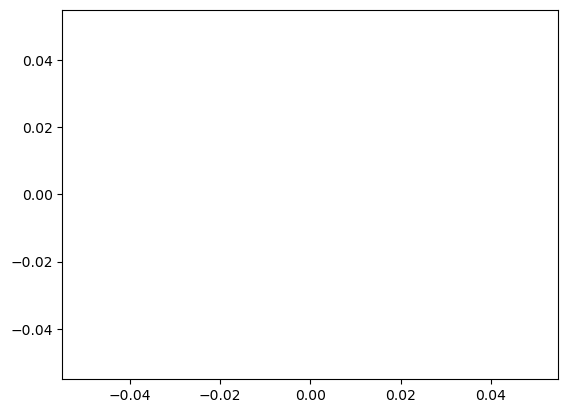

In [116]:
# Make sure to find data sets that have full enough rows to provide a good scatterplot

plot_inputs('United States', 'Public spending on education, total (% of GDP)', 'Cause of death, by injury (% of total)')